# Name: Sayali Suresh Ranjane
# Gmail: sayaliranjane28@gmail.com
# LinkedIn: https://www.linkedin.com/in/sayali-ranjane-595606187/
# GitHub: https://github.com/Sayaliranjane/Analysis/
# Task-2 Prediction Using Unsupervised ML

In [29]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading the Data

In [30]:
iris = datasets.load_iris()

#iris = pd.DataFrame(iris.data, columns = iris.feature_names)

# Define Target and Predictors

In [31]:
X = iris.data[:, :2]

y = iris.target

Text(0, 0.5, 'Sepal Width')

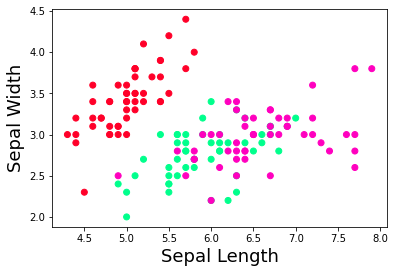

In [32]:
#Have a look at our data through a scatter plot

plt.scatter(X[: , 0], X[: , 1], c = y, cmap = 'gist_rainbow')
plt.xlabel('Sepal Length', fontsize = 18)
plt.ylabel('Sepal Width', fontsize = 18)


# Now, let's instantiate and fit our K means cluster model. we are going to use three clusters and a random state of 21

In [34]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state = 21)

km.fit(X)

C:\Users\91771\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

# Identify the center points of the data

In [35]:
centers = km.cluster_centers_

print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


# Let's compare original data vs clustered results

In [37]:
#This will tell us to which cluster does the data observations belong

new_labels = km.labels_


Text(0.5, 1.0, 'Predicted')

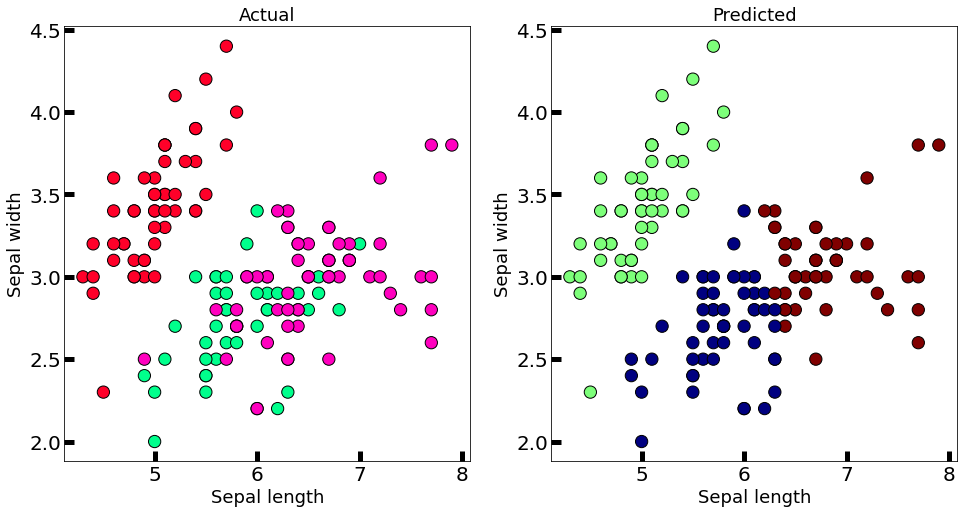

In [38]:
#Plot the identified clusters

fig, axes = plt.subplots(1, 2, figsize = (16 , 8))

axes[0].scatter(X[: , 0], X[: , 1], c = y, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)

axes[0].set_xlabel('Sepal length', fontsize = 18)

axes[0].set_ylabel('Sepal width', fontsize = 18)

axes[0].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)

axes[0].set_title('Actual', fontsize = 18)

axes[1].scatter(X[: , 0], X[: , 1], c = new_labels, cmap = 'jet', edgecolor = 'k', s = 150)

axes[1].set_xlabel('Sepal length', fontsize = 18)

axes[1].set_ylabel('Sepal width', fontsize = 18)

axes[1].tick_params(direction = 'in', length = 10, width = 5, colors = 'k', labelsize = 20)

axes[1].set_title('Predicted', fontsize = 18)


# K- Means Clustering

In [39]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


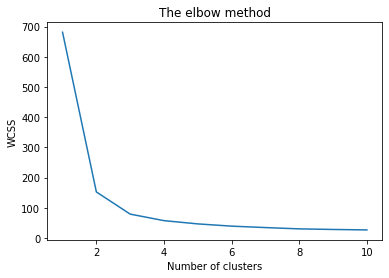

In [40]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [41]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

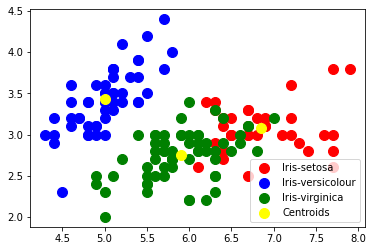

In [42]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()